In [1]:
# MLFA ASSIGNMENT 7
# ROHIT RANJAN
# 20CS30066

In [2]:
# importing required modules
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# reading the data csv
df = pd.read_csv('data.csv')

In [4]:
# inserting a column with value 1 for vectorisation later
df.insert(0, 'Constant', 1)

In [5]:
df = df[['Constant', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'num       ']]

In [6]:
df.head(5)

,Constant,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,1,28,1,2,130,132,0,2,185,0,0.0,0
1,1,29,1,2,120,243,0,0,160,0,0.0,0
2,1,29,1,2,140,?,0,0,170,0,0.0,0
3,1,30,0,1,170,237,0,1,170,0,0.0,0
4,1,31,0,2,100,219,0,1,150,0,0.0,0


In [7]:
# removing rows with missing values
df = df[df[df.columns]!='?']
df = df.dropna()
df = df.astype(float)

/home/tfjuror/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
# all missing values have been dealt with
np.sum(df.isna())

Constant      0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [9]:
df.columns

Index(['Constant', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'num       '],
      dtype='object')

In [10]:
X_columns = ['Constant','age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach',
       'exang', 'oldpeak']
Y_column = 'num       '

In [11]:
X = df[X_columns]
Y = df[Y_column]

print(X.shape)
print(Y.shape)

(261, 11)
(261,)


In [12]:
# creating the train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=43)

In [13]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(208, 11)
(208,)
(53, 11)
(53,)


In [14]:
# weights randomly initialised
W = np.random.rand(X_train.shape[1],1)

In [15]:
# initial weights
print(W)

[[0.77406693]
 [0.48471468]
 [0.45808011]
 [0.94479394]
 [0.14039468]
 [0.6485074 ]
 [0.08192375]
 [0.77692235]
 [0.28227551]
 [0.7133849 ]
 [0.79360614]]


In [16]:
# hyperparameters defined here
epochs = 10000
lr = 1e-4
lasso_param = 0.5
loss_array=[]

In [17]:
# training loop with inbuilt updates via gradient descent
for epoch in tqdm(range(epochs),position=0, leave=True):
    if(epoch%2000 == 0):
        lr/=10
    L = 0
    del_L = np.zeros((X_train.shape[1],))
    for i in range(len(X_train)):
        row = np.array(X_train.iloc[i,:])
        row = np.reshape(row,(row.shape[0],1))
        H = (row.T.astype(float) @ W.astype(float))
        L += (H - float(Y_train.iloc[i]))**2
        for j in range(len(del_L)):
            del_L[j]+=(H - float(Y_train.iloc[i]))*row[j]
    L /= 2*len(X_train)
    L += np.sum(np.abs(W))*lasso_param
    del_L /= len(X_train)
    for i in range(1,len(del_L)):
        if (W[j]>0):
            del_L +=1*lasso_param
        else:
            del_L -=1*lasso_param
    loss_array.append(L.item())
    for j in range(len(del_L)):
        W[j] = W[j] - lr* del_L[j]

100%|██████████| 10000/10000 [16:17<00:00, 10.23it/s]


In [18]:
# finetuned weights after training
print(W)

[[ 0.65966752]
 [ 0.03148896]
 [ 0.34232791]
 [ 0.80420487]
 [-0.03974412]
 [-0.00319577]
 [-0.0299112 ]
 [ 0.66100976]
 [ 0.00601589]
 [ 0.59315698]
 [ 0.66494104]]


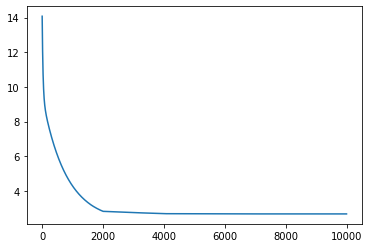

In [19]:
# decreasing losses visualised
# first couple losses are removed from plotting to avoid skew due to random initialisation
plt.plot(loss_array[2:])

In [20]:
# utility function to generate predictions
def gen_preds(W,X):
    preds = []
    for i in range(len(X)):
        row = np.array(X.iloc[i,:])
        row = np.reshape(row,(row.shape[0],1))
        H = (row.T.astype(float) @ W.astype(float))
        threshed = 1 if H.item()>0.5 else 0
        preds.append(threshed)
    return np.array(preds)

In [21]:
preds_train = gen_preds(W,X_train)
preds_test = gen_preds(W,X_test)

In [22]:
print('RMSE on train set',mean_squared_error(Y_train,np.array(preds_train)))
print('RMSE on test set',mean_squared_error(Y_test,np.array(preds_test)))

RMSE on train set 0.22596153846153846
RMSE on test set 0.2641509433962264


In [23]:
print('Accuracy on train set',accuracy_score(Y_train,np.array(preds_train)))
print('Accuracy on test set',accuracy_score(Y_test,np.array(preds_test)))

Accuracy on train set 0.7740384615384616
Accuracy on test set 0.7358490566037735
